In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [2]:
df = pd.read_csv("final_economic_data.csv")

df_total = df.copy()  

df_total = df_total[(df_total["Year"] >= 2010) & (df_total["Year"] <= 2022)] #no imports/exports

In [3]:
#Predicting GDP

#region specific feature sets

region_features = {
    1: [
        "20 - 24 Total (population)",
        "Employed (PT)",
        "Hours worked, domestic (1 000 000 h)",
        "Vacancies",
    ],
    2: [
        "Gross value added (millions of euro), T Activities of households as employers; undifferentiated goods- and services-producing activities of households for own use(97-98)",
        "Gross value added (millions of euro), R, S Other service activities (90-96)",
        "Others (PT)",
        "20 - 24 Urban (population)",
    ],
    4: [
        "Workplaces, total (TP)",
        "Gross value added (millions of euro), O Public administration and defence; compulsory social security (84)",
        "Median of debt for housing loan debts",
        "Property income, (incl. holding gains and losses), income",
    ],
    5: [
        "Gross value added (millions of euro), D, E Electricity, gas, steam and air conditioning and water supply; sewerage and waste management (35-39)",
        "Gross value added (millions of euro), T Activities of households as employers; undifferentiated goods- and services-producing activities of households for own use(97-98)",
        "Gross value added (millions of euro), C Manufacturing (10-33)",
        "75- Urban (population)",
    ],
    6: [
        "40 - 44 Urban (population)",
        "J Information and communication (TP)",
        "Gross value added (millions of euro), J Information and communication (58-63)",
        "60 - 64 Total (population)",
        "Employer's social security contributions",
    ],
    7: [
        "Gross value added (millions of euro), C Manufacturing (10-33)",
        "Total (population)",
        "75- Urban (population)",
    ],
    8: [
        "Total Urban (population)",
        "H Transportation and storage (TP)",
        "Pensioners (PT)",
        "M Professional, scientific and technical activities (TP)",
    ],
    9: [
        "Vacancies",
        "H Transportation and storage (TP)",
        "Gross value added (millions of euro), R, S Other service activities (90-96)",
        "Median of debt for consumption debts and other debts",
    ],
    10: [
        "Q Human health and social work activities (TP)",
        "Gross value added (millions of euro), C Manufacturing (10-33)",
        "30 - 34 Total (population)",
    ],
    11: [
        "55 - 59 Total (population)",
        "Gross value added (millions of euro), P Education (85)",
        "Gross value added (millions of euro), L Real estate activities",
        "Gross value added (millions of euro), C Manufacturing (10-33)",
    ],
    12: [
        "Vacancies",
        "J Information and communication (TP)",
        "Gross value added (millions of euro), C Manufacturing (10-33)",
        "Students (PT)",
    ],
    13: [
        "Mean of debt for housing loan debts",
        "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
        "Gross value added (millions of euro), I Accommodation and food service activities (55-56)",
        "I Accommodation and food service activities (TP)",
        "H Transportation and storage (TP)",
    ],
    14: [
        "H Transportation and storage (TP)",
        "Gross value added (millions of euro), D, E Electricity, gas, steam and air conditioning and water supply; sewerage and waste management (35-39)",
        "Mean of debt for study loan debts",
        "Vacancies",
    ],
    15: [
        "Gross value added (millions of euro), R, S Other service activities (90-96)",
        "Disposable income, net",
        "O Public administration and defence; compulsory social security (TP)",
        "C Manufacturing (TP)",
        "L Real estate activities (TP)",
    ],
    16: [
        "Median of debt for consumption debts and other debts",
        "Inhabitants, total (PT)",
        "55 - 59 Total (population)",
        "50 - 54 Urban (population)",
        "Q Human health and social work activities (TP)",
    ],
    17: [
        "Gross value added (millions of euro), C Manufacturing (10-33)",
        "Median of debt for housing loan debts",
        "Aged 18 or over, total (population)",
        "D Electricity, gas, steam and air conditioning supply (TP)",
        "Services (TP)",
    ],
    18: [
        "50 - 54 Total (population)",
        "70 - 74 Urban (population)",
        "Academic degree, lowest level tertiary and lower university level degrees (population)",
        "Vacancies",
        "Gross value added (millions of euro), J Information and communication (58-63)",
    ],
    19: [
        "Gross value added (millions of euro), C Manufacturing (10-33)",
        "E Water supply; sewerage, waste management and remediation activities (TP)",
        "Vacancies",
        "Workplaces, total (TP)",
    ],
    21: [
        "Gross value added (millions of euro), H Transportation and storage (49-53)",
        "Gross value added (millions of euro), I Accommodation and food service activities (55-56)",
        "Income, property and other direct taxes excl. capital taxes, expenditure",
        "Gross value added (millions of euro), K Financial and insurance activities (64-66)",
        "I Accommodation and food service activities (TP)",
    ],
}

target_col = "GDP per capita (euro at current prices)"

regions = df_total["Region"].unique()



Region 1
cols_features = [
    "20 - 24 Total (population)",
    "Employed (PT)",
    "Hours worked, domestic (1 000 000 h)",
    "Vacancies",
]
Region 1 - Train R²: 0.9854493404230058
Region 1 - Test  R²: 0.9984594682741638


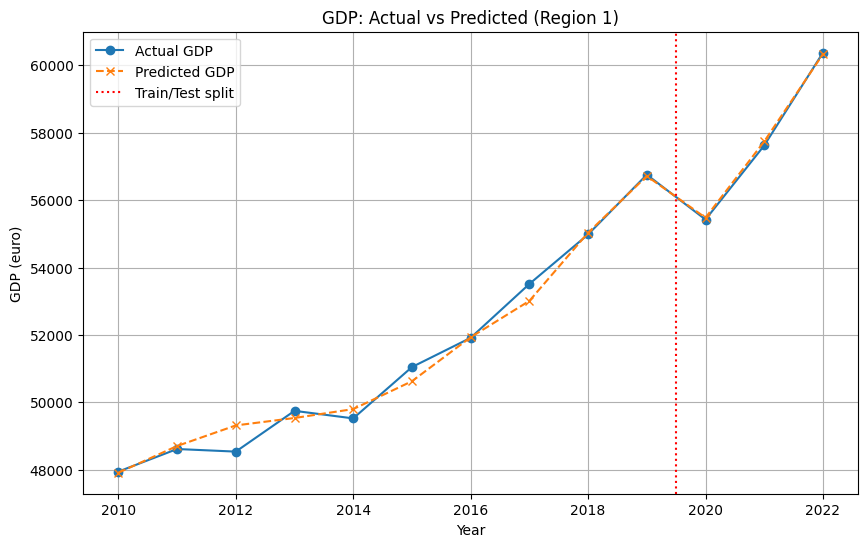


Region 2
cols_features = [
    "Gross value added (millions of euro), T Activities of households as employers; undifferentiated goods- and services-producing activities of households for own use(97-98)",
    "Gross value added (millions of euro), R, S Other service activities (90-96)",
    "Others (PT)",
    "20 - 24 Urban (population)",
]
Region 2 - Train R²: 0.9740155113556954
Region 2 - Test  R²: 0.9913458788146235


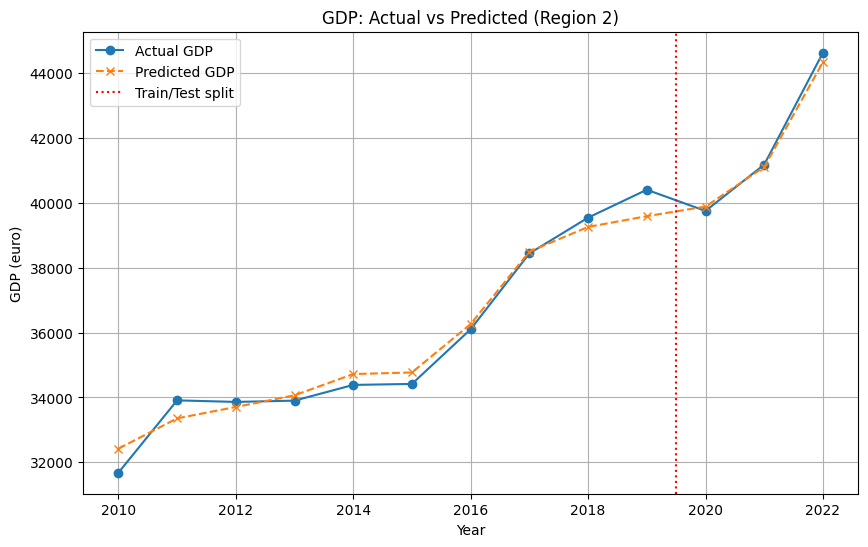


Region 4
cols_features = [
    "Workplaces, total (TP)",
    "Gross value added (millions of euro), O Public administration and defence; compulsory social security (84)",
    "Median of debt for housing loan debts",
    "Property income, (incl. holding gains and losses), income",
]

Region 5
cols_features = [
    "Gross value added (millions of euro), D, E Electricity, gas, steam and air conditioning and water supply; sewerage and waste management (35-39)",
    "Gross value added (millions of euro), T Activities of households as employers; undifferentiated goods- and services-producing activities of households for own use(97-98)",
    "Gross value added (millions of euro), C Manufacturing (10-33)",
    "75- Urban (population)",
]
Region 5 - Train R²: 0.9690217545855175
Region 5 - Test  R²: 0.9769854256290095


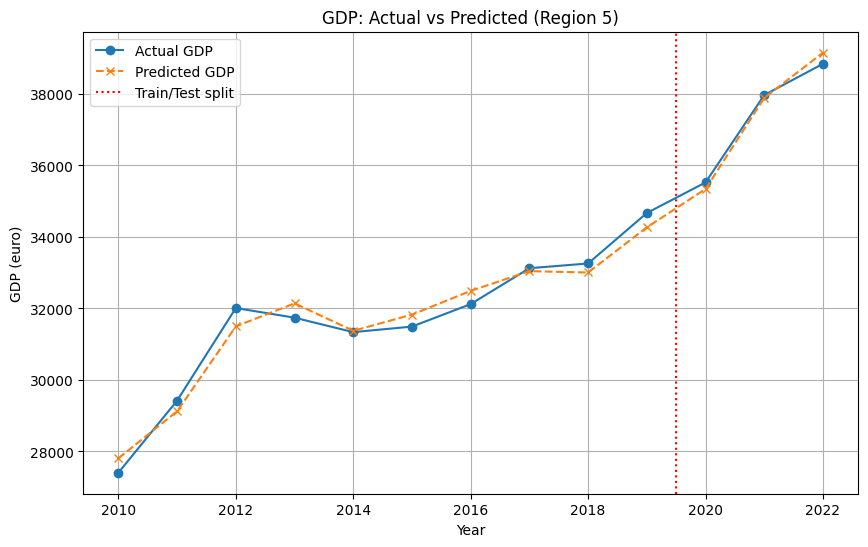


Region 6
cols_features = [
    "40 - 44 Urban (population)",
    "J Information and communication (TP)",
    "Gross value added (millions of euro), J Information and communication (58-63)",
    "60 - 64 Total (population)",
    "Employer's social security contributions",
]
Region 6 - Train R²: 0.9638634109397997
Region 6 - Test  R²: 0.999098043146904


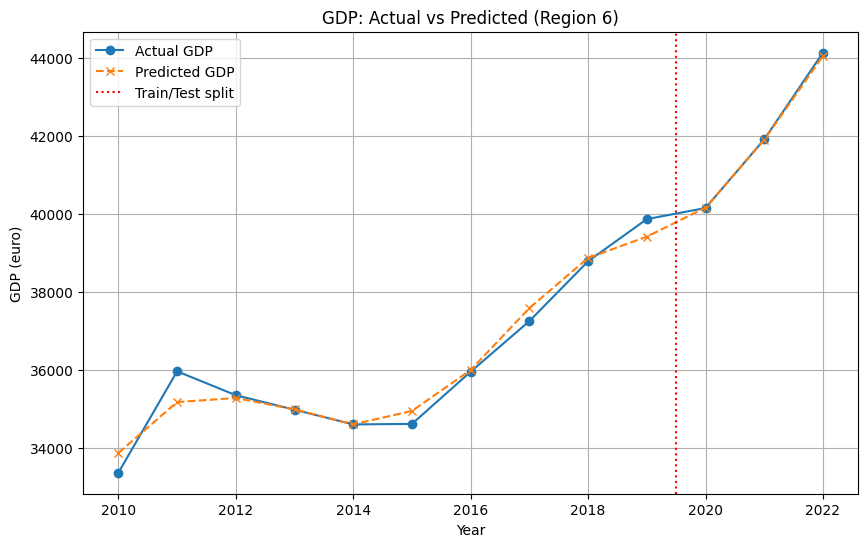


Region 7
cols_features = [
    "Gross value added (millions of euro), C Manufacturing (10-33)",
    "Total (population)",
    "75- Urban (population)",
]
Region 7 - Train R²: 0.9626983586478769
Region 7 - Test  R²: 0.9809491813498764


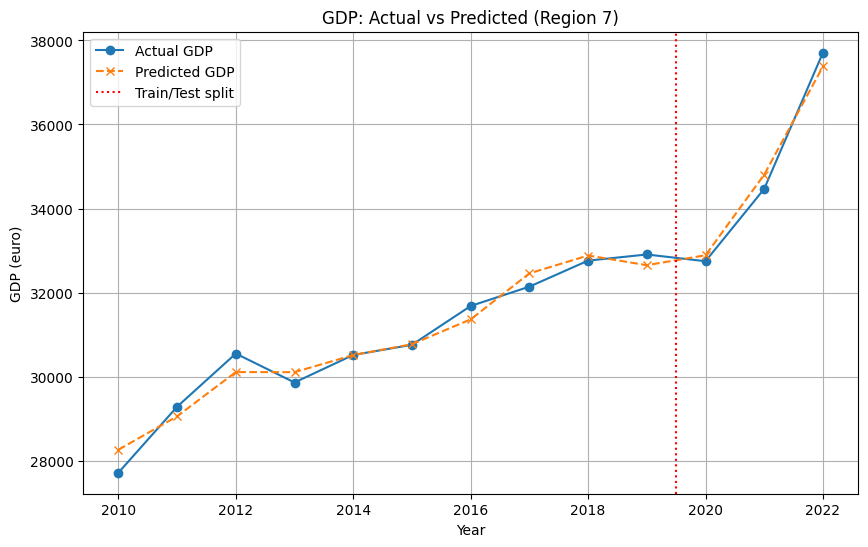


Region 8
cols_features = [
    "Total Urban (population)",
    "H Transportation and storage (TP)",
    "Pensioners (PT)",
    "M Professional, scientific and technical activities (TP)",
]
Region 8 - Train R²: 0.9787897373494328
Region 8 - Test  R²: 0.9909907707075284


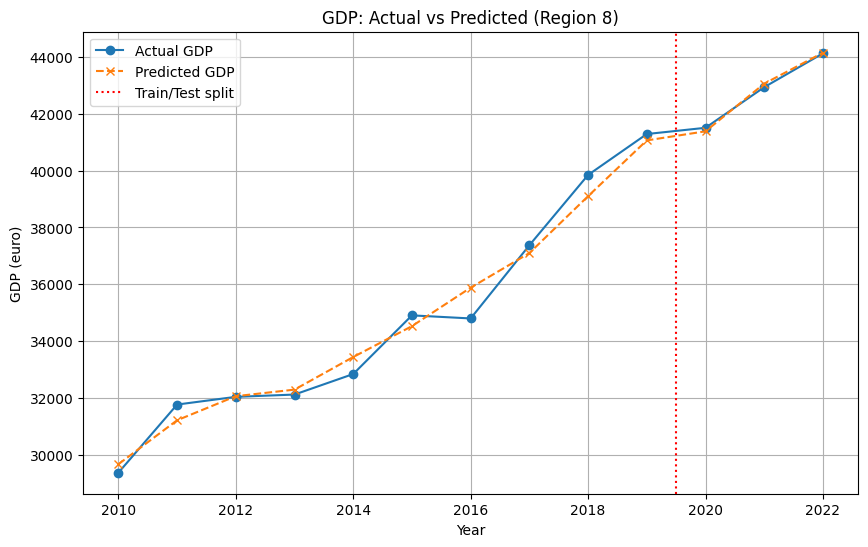


Region 9
cols_features = [
    "Vacancies",
    "H Transportation and storage (TP)",
    "Gross value added (millions of euro), R, S Other service activities (90-96)",
    "Median of debt for consumption debts and other debts",
]

Region 10
cols_features = [
    "Q Human health and social work activities (TP)",
    "Gross value added (millions of euro), C Manufacturing (10-33)",
    "30 - 34 Total (population)",
]
Region 10 - Train R²: 0.9590316486985045
Region 10 - Test  R²: 0.9617090711983061


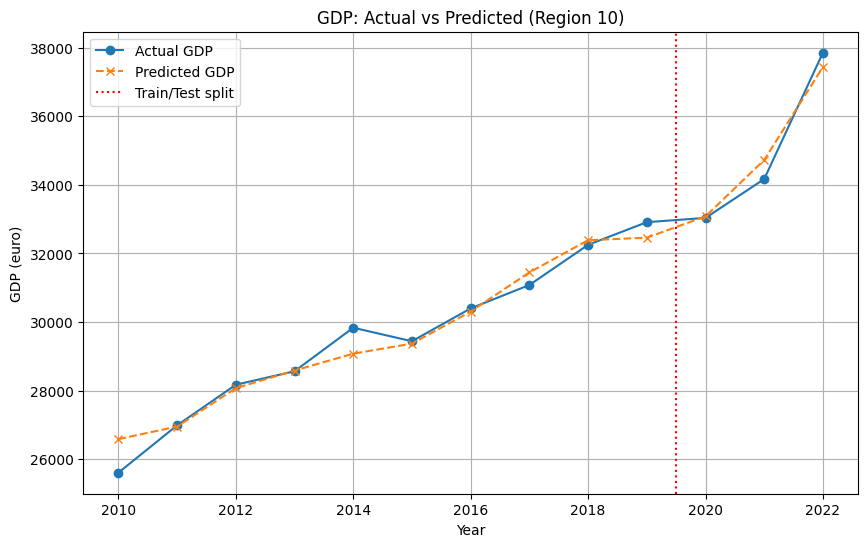


Region 11
cols_features = [
    "55 - 59 Total (population)",
    "Gross value added (millions of euro), P Education (85)",
    "Gross value added (millions of euro), L Real estate activities",
    "Gross value added (millions of euro), C Manufacturing (10-33)",
]
Region 11 - Train R²: 0.9842776167777988
Region 11 - Test  R²: 0.9937809657858994


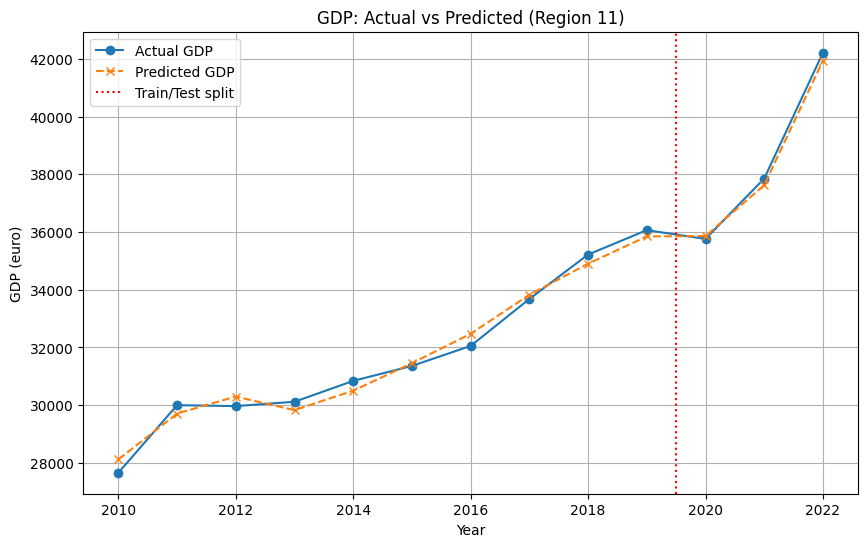


Region 12
cols_features = [
    "Vacancies",
    "J Information and communication (TP)",
    "Gross value added (millions of euro), C Manufacturing (10-33)",
    "Students (PT)",
]
Region 12 - Train R²: 0.9803365113655687
Region 12 - Test  R²: 0.9959520294684232


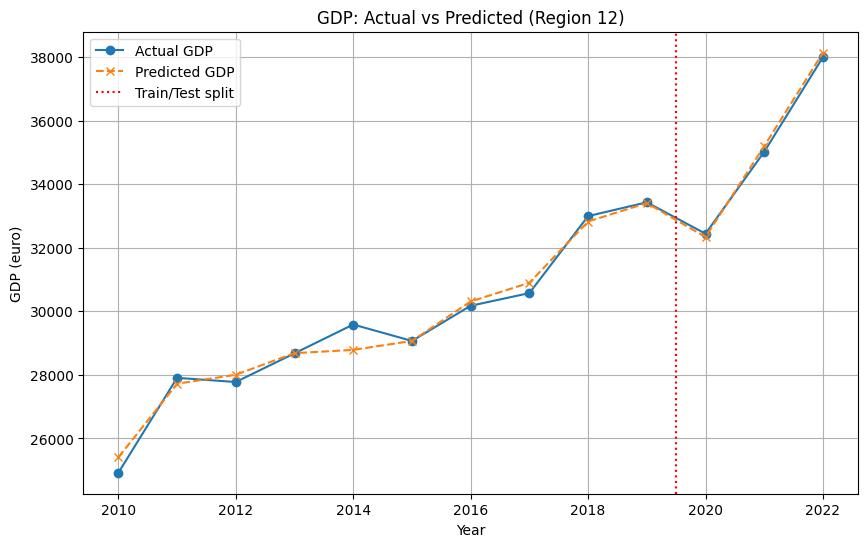


Region 13
cols_features = [
    "Mean of debt for housing loan debts",
    "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
    "Gross value added (millions of euro), I Accommodation and food service activities (55-56)",
    "I Accommodation and food service activities (TP)",
    "H Transportation and storage (TP)",
]
Region 13 - Train R²: 0.9778499061213962
Region 13 - Test  R²: 0.9838623383442285


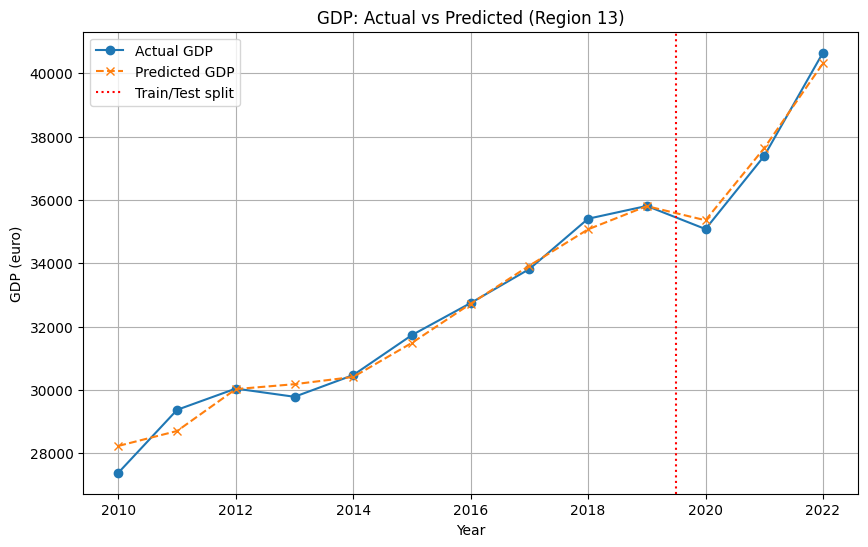


Region 14
cols_features = [
    "H Transportation and storage (TP)",
    "Gross value added (millions of euro), D, E Electricity, gas, steam and air conditioning and water supply; sewerage and waste management (35-39)",
    "Mean of debt for study loan debts",
    "Vacancies",
]
Region 14 - Train R²: 0.9707245861186021
Region 14 - Test  R²: 0.9916270022268886


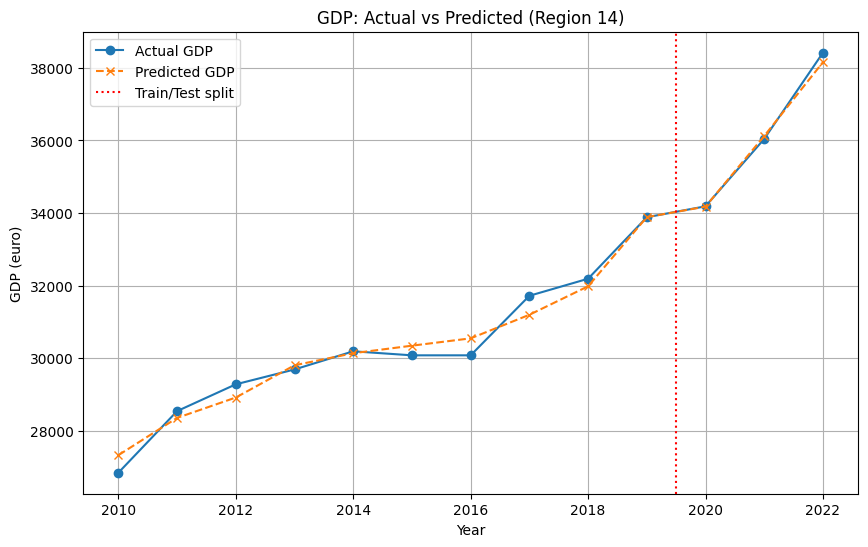


Region 15
cols_features = [
    "Gross value added (millions of euro), R, S Other service activities (90-96)",
    "Disposable income, net",
    "O Public administration and defence; compulsory social security (TP)",
    "C Manufacturing (TP)",
    "L Real estate activities (TP)",
]
Region 15 - Train R²: 0.9705510233775101
Region 15 - Test  R²: 0.9808908584634651


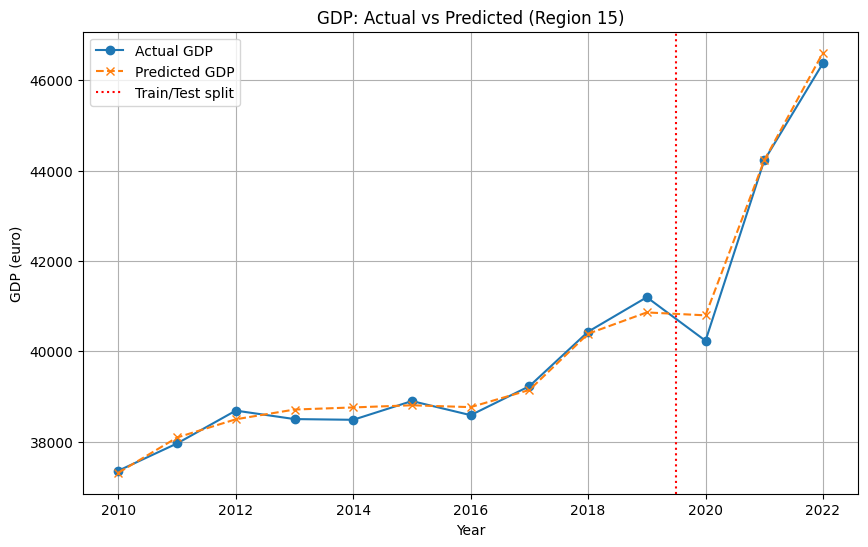


Region 16
cols_features = [
    "Median of debt for consumption debts and other debts",
    "Inhabitants, total (PT)",
    "55 - 59 Total (population)",
    "50 - 54 Urban (population)",
    "Q Human health and social work activities (TP)",
]

Region 17
cols_features = [
    "Gross value added (millions of euro), C Manufacturing (10-33)",
    "Median of debt for housing loan debts",
    "Aged 18 or over, total (population)",
    "D Electricity, gas, steam and air conditioning supply (TP)",
    "Services (TP)",
]

Region 18
cols_features = [
    "50 - 54 Total (population)",
    "70 - 74 Urban (population)",
    "Academic degree, lowest level tertiary and lower university level degrees (population)",
    "Vacancies",
    "Gross value added (millions of euro), J Information and communication (58-63)",
]
Region 18 - Train R²: 0.9567883738027112
Region 18 - Test  R²: 0.9855477251245367


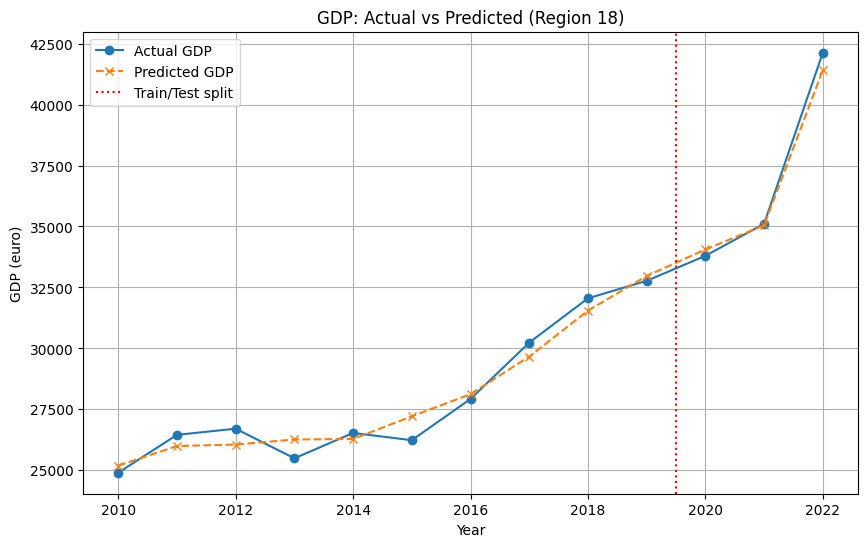


Region 19
cols_features = [
    "Gross value added (millions of euro), C Manufacturing (10-33)",
    "E Water supply; sewerage, waste management and remediation activities (TP)",
    "Vacancies",
    "Workplaces, total (TP)",
]
Region 19 - Train R²: 0.9830468057037354
Region 19 - Test  R²: 0.9884442434655651


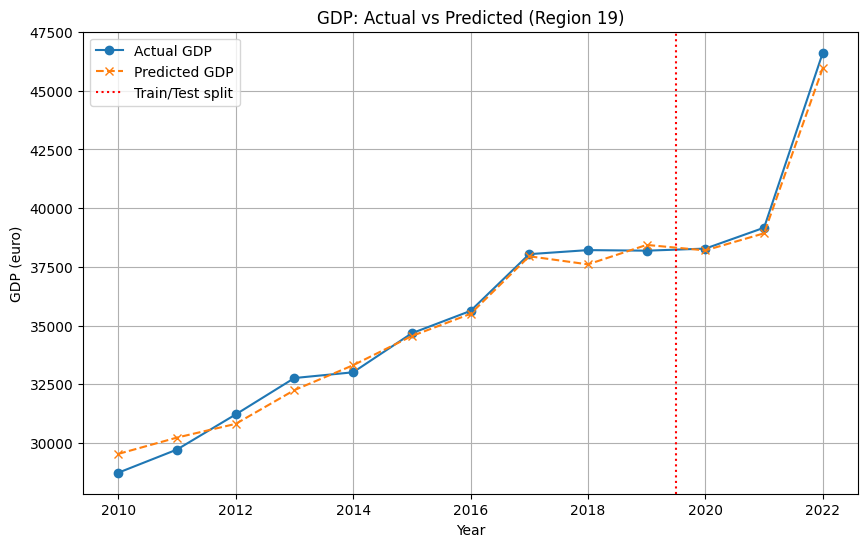


Region 21
cols_features = [
    "Gross value added (millions of euro), H Transportation and storage (49-53)",
    "Gross value added (millions of euro), I Accommodation and food service activities (55-56)",
    "Income, property and other direct taxes excl. capital taxes, expenditure",
    "Gross value added (millions of euro), K Financial and insurance activities (64-66)",
    "I Accommodation and food service activities (TP)",
]
Region 21 - Train R²: 0.9663445093811532
Region 21 - Test  R²: 0.9808330919004262


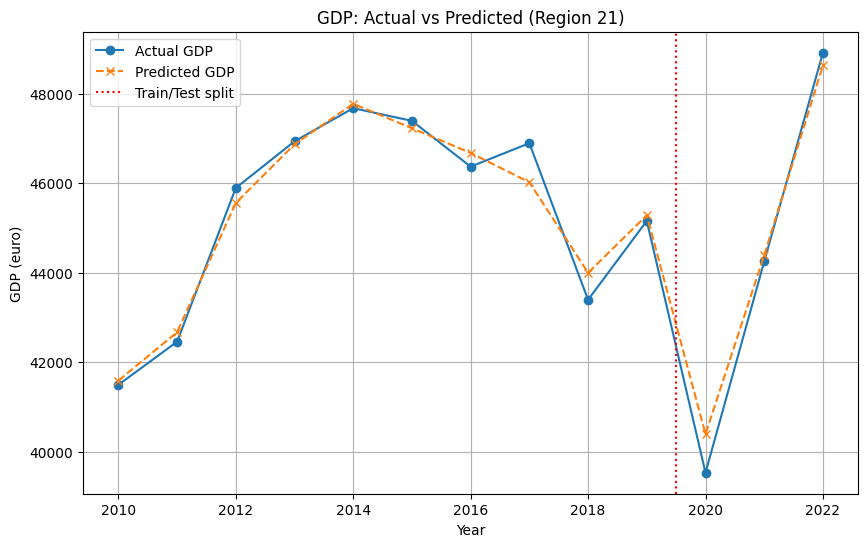

In [4]:
for region in sorted(region_features.keys()):
    cols_features = region_features[region]

    print(f"\nRegion {region}")
    print("cols_features = [")
    for f in cols_features:
        print(f'    "{f}",')
    print("]")

    df_region = df_total[df_total["Region"] == region]


    # drop missing values
    df_model = df_region[["Year"] + cols_features + [target_col]].dropna()

    #drop empty and with not enough data regions
    if len(df_model) < 4:
        continue

    #features, target, year
    X = df_model[cols_features].copy()
    y = df_model[target_col]
    years = df_model["Year"]

    #adding year as predictor (new column)
    X["Year"] = years

    #train/test split by year
    X_train = X.loc[years <= 2019]
    y_train = y.loc[years <= 2019]
    X_test  = X.loc[years >= 2020]
    y_test  = y.loc[years >= 2020]
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #Ridge Regression (regularized LR)
    model = Ridge(alpha=1.0)
    model.fit(X_train_scaled, y_train)

    #predictions
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test  = model.predict(X_test_scaled)

    #predict on all data for plotting
    X_scaled_all = scaler.transform(X)
    y_pred_all = model.predict(X_scaled_all)
    
    results = pd.DataFrame({
        "Year": years,
        "Actual GDP": y,
        "Predicted GDP": y_pred_all
    }).sort_values("Year")
    
    print(f"Region {region} - Train R²:", model.score(X_train_scaled, y_train))
    print(f"Region {region} - Test  R²:", model.score(X_test_scaled, y_test))
    
    plt.figure(figsize=(10,6))
    plt.plot(results["Year"], results["Actual GDP"], label="Actual GDP", marker="o")
    plt.plot(results["Year"], results["Predicted GDP"], label="Predicted GDP", marker="x", linestyle="--")
    plt.axvline(2019.5, color="red", linestyle=":", label="Train/Test split")
    plt.xlabel("Year")
    plt.ylabel("GDP (euro)")
    plt.title(f"GDP: Actual vs Predicted (Region {region})")
    plt.legend()
    plt.grid(True)
    plt.show()